In [1]:
import numpy as np
import sys
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Functions implementation 

In [2]:
def Batch_Perceptron (x,y):
    LR = 1
    NumberOfFeatures = len(x)
    TrainingSet_length = x.shape[1]
    Weights = np.array([float(random.randrange(-100, 100))/100 for _ in range(x.shape[1])])
    Delta =  np.ones(TrainingSet_length)
    count_Weights = 0
    Every_Delta = []
    while np.linalg.norm(Delta,1) > sys.float_info.epsilon:
        Delta =  np.zeros(TrainingSet_length)
        for item in range(NumberOfFeatures):
            u = Weights.dot(x[item])
            if y[item]*u <= 0:
                Delta = Delta - (y[item]*x[item])
                
        Delta = Delta/NumberOfFeatures
        Every_Delta.append(np.linalg.norm(Delta,1))
        Weights = Weights - (LR*Delta)
        count_Weights +=1
    return Weights,count_Weights,Delta,Every_Delta

In [3]:
def Online_Batch_Perceptron (x,y):
    LR = 1
    NumberOfFeatures = len(x)
    TrainingSet_length = x.shape[1]
    Weights = np.array([float(random.randrange(-100, 100))/100 for _ in range(x.shape[1])])
    Delta =  np.ones(TrainingSet_length)
    count = 0
    count_Delta   = 0
    Every_Delta = []
    while np.linalg.norm(Delta,1) > sys.float_info.epsilon:
        Delta =  np.zeros(TrainingSet_length)
        count_Delta += 1
        for item in range(NumberOfFeatures):
            u = Weights.dot(x[item])
            if y[item]*u <= 0:
                Delta = Delta - (y[item]*x[item])
                Delta = Delta/NumberOfFeatures
                Weights = Weights - (LR*Delta)
                count +=1
        Every_Delta.append(np.linalg.norm(Delta,1))
    return Weights,count,Delta,Every_Delta,count_Delta

# Problem 1

### Batch_Perceptron algorithm 

wights of Batch_Perceptron algorithm :  [ -5.27  484.515]
number of each time algorithm updated model weights of Batch_Perceptron algorithm :  2421
Number of epochs needed to achieve almost zero error - Batch_Perceptron algorithm :  2421


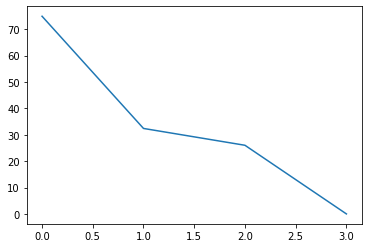

In [99]:
x = np.array([[50,55,70,80,130,150, 155,160],[1,1,1,1,1,1,1,1]]).T
y = np.array([1,1,1,1,-1,-1,-1,-1])

weights, count_w, delta,Every_Delta = Batch_Perceptron(x, y)

print("wights of Batch_Perceptron algorithm : ",weights)
print("number of each time algorithm updated model weights of Batch_Perceptron algorithm : ",count_w)
print("Number of epochs needed to achieve almost zero error - Batch_Perceptron algorithm : ",count_w)

Every_Delta = np.unique(Every_Delta)

plt.plot(np.flip(np.arange(0,len(Every_Delta))),Every_Delta)

### Online_Batch_Perceptron algorithm

wights of Online_Batch_Perceptron algorithm :  [-0.13070313 10.67917969]
number of each time algorithm updated model weights of Online_Batch_Perceptron algorithm :  203
Number of epochs needed to achieve almost zero error - Online_Batch_Perceptron algorithm :  67


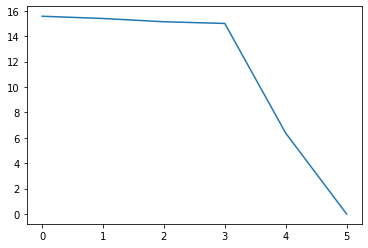

In [100]:
x = np.array([[50,55,70,80,130,150, 155,160],[1,1,1,1,1,1,1,1]]).T
y = np.array([1,1,1,1,-1,-1,-1,-1])

weights, count, delta,Every_Delta,count_d = Online_Batch_Perceptron(x, y)

print("wights of Online_Batch_Perceptron algorithm : ",weights)
print("number of each time algorithm updated model weights of Online_Batch_Perceptron algorithm : ",count)
print("Number of epochs needed to achieve almost zero error - Online_Batch_Perceptron algorithm : ",count_d)

Every_Delta = np.unique(Every_Delta)

plt.plot(np.flip(np.arange(0,len(Every_Delta))),Every_Delta)

# Problem 4

### Batch_Perceptron algorithm

wights of Batch_Perceptron algorithm :  [-64.02   32.355  63.52    0.145]
number of each time algorithm updated model weights of Batch_Perceptron algorithm :  6
Number of epochs needed to achieve almost zero error - Batch_Perceptron algorithm :  6


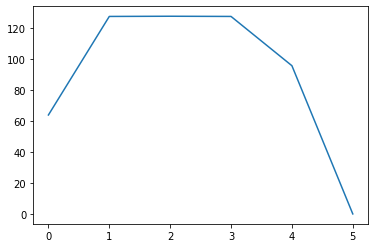

In [101]:
x = np.array([[0,0,0,255,0,255,255,255],[0,0,255,0,255,255,0,255],[0,255,0,0,255,0,255,255],[1,1,1,1,1,1,1,1]]).T
y = np.array([1,1,1,-1,1,-1,-1,1])

weights, count_w, delta,Every_Delta = Batch_Perceptron(x, y)

print("wights of Batch_Perceptron algorithm : ",weights)
print("number of each time algorithm updated model weights of Batch_Perceptron algorithm : ",count_w)
print("Number of epochs needed to achieve almost zero error - Batch_Perceptron algorithm : ",count_w)

plt.plot(np.arange(0,len(Every_Delta)),Every_Delta)

### Online_Batch_Perceptron algorithm 

wights of Online_Batch_Perceptron algorithm :  [-4.04017969e+01  2.75025781e+01  3.18053027e+01  1.80969238e-02]
number of each time algorithm updated model weights of Online_Batch_Perceptron algorithm :  8
Number of epochs needed to achieve almost zero error - Online_Batch_Perceptron algorithm :  4


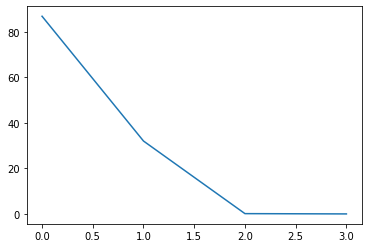

In [102]:
x = np.array([[0,0,0,255,0,255,255,255],[0,0,255,0,255,255,0,255],[0,255,0,0,255,0,255,255],[1,1,1,1,1,1,1,1]]).T
y = np.array([1,1,1,-1,1,-1,-1,1])

weights, count, delta,Every_Delta,count_d = Online_Batch_Perceptron(x, y)

print("wights of Online_Batch_Perceptron algorithm : ",weights)
print("number of each time algorithm updated model weights of Online_Batch_Perceptron algorithm : ",count)
print("Number of epochs needed to achieve almost zero error - Online_Batch_Perceptron algorithm : ",count_d)

plt.plot(np.arange(0,len(Every_Delta)),Every_Delta)

# Repeating on randomly generated data without bias 

### Online_Batch_Perceptron algorithm  -> Train set

wights of Online_Batch_Perceptron algorithm :  [0.24610127 0.88789378]
number of each time algorithm updated model weights of Online_Batch_Perceptron algorithm :  8
Number of epochs needed to achieve almost zero error - Online_Batch_Perceptron algorithm :  3


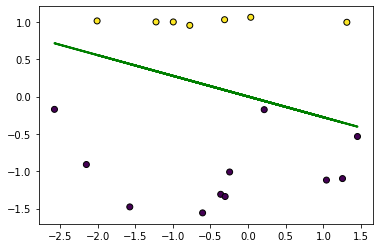

In [103]:
x,y = make_classification(n_samples=25,n_features=2,n_redundant = 0,n_informative=1,n_clusters_per_class=1)

mask_for_y = y == 0
y[mask_for_y] = - 1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

w = np.array([float(random.randrange(-100, 100))/100 for _ in range(x.shape[1])])

weights, count_w, delta,Every_Delta,count_d = Online_Batch_Perceptron(X_train, y_train)

print("wights of Online_Batch_Perceptron algorithm : ",weights)
print("number of each time algorithm updated model weights of Online_Batch_Perceptron algorithm : ",count)
print("Number of epochs needed to achieve almost zero error - Online_Batch_Perceptron algorithm : ",count_d)

w1 = weights[0]
w2 = weights[1]

m = -w1 / w2

plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train,edgecolor='k')

plt.plot(X_train,m * X_train , "g-", linewidth=2)


###  Online_Batch_Perceptron algorithm -> Test set

In [4]:
sign = lambda x: math.copysign(1,x)

accuracy of the model is :  1.0


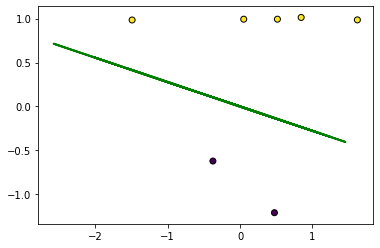

In [105]:
TrueValueOfY = y_test
PredectedValueOfY = []
for x in X_test:
    PredectedValueOfY.append(sign(weights.dot(x)))

accuracy = accuracy_score(TrueValueOfY, PredectedValueOfY)

print("accuracy of the model is : ",accuracy)

plt.scatter(X_test[:,0],X_test[:,1],marker='o',c=y_test,edgecolor='k')

plt.plot(X_train,m * X_train , "g-", linewidth=2)

# Repeating on randomly generated data without bias

### Batch_Perceptron algorithm -> Train set

wights of Batch_Perceptron algorithm :  [-0.31459554  0.68142681]
number of each time algorithm updated model weights of Batch_Perceptron algorithm :  3
Number of epochs needed to achieve almost zero error - Batch_Perceptron algorithm :  3


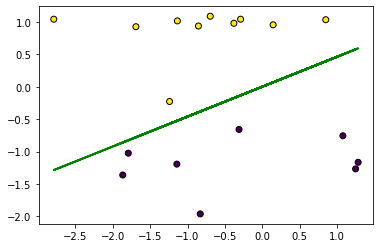

In [11]:
x,y = make_classification(n_samples=25,n_features=2,n_redundant = 0,n_informative=1,n_clusters_per_class=1)

mask_for_y = y == 0
y[mask_for_y] = - 1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

weights, count_w, delta,Every_Delta = Batch_Perceptron(X_train, y_train)

print("wights of Batch_Perceptron algorithm : ",weights)
print("number of each time algorithm updated model weights of Batch_Perceptron algorithm : ",count_w)
print("Number of epochs needed to achieve almost zero error - Batch_Perceptron algorithm : ",count_w)

w1 = weights[0]
w2 = weights[1]

m = -w1 / w2

plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train,edgecolor='k')

plt.plot(X_train,m * X_train , "g-", linewidth=2)


### Batch_Perceptron algorithm -> Test set

accuracy of the model is :  1.0


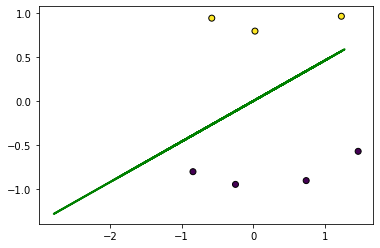

In [12]:
TrueValueOfY = y_test
PredectedValueOfY = []
for x in X_test:
    PredectedValueOfY.append(sign(weights.dot(x)))

accuracy = accuracy_score(TrueValueOfY, PredectedValueOfY)

print("accuracy of the model is : ",accuracy)
plt.scatter(X_test[:,0],X_test[:,1],marker='o',c=y_test,edgecolor='k')

plt.plot(X_train,m * X_train , "g-", linewidth=2)